# 03G. Effective potential revisited"

### Mingyang Lu

### 1/5/2024

Consider the following system:

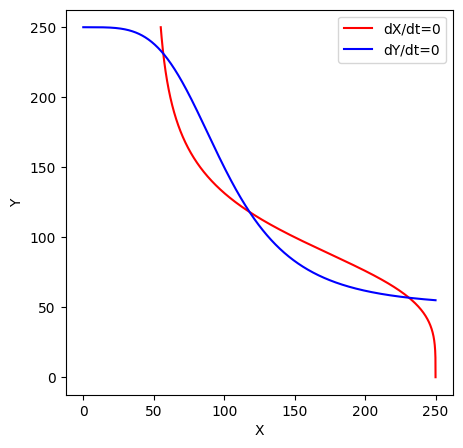

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define ODE terms
def derivs_ts(t, Xs):
    dXdt = 5 + 20 / (1 + (Xs[1] / 100) ** 4) - 0.1 * Xs[0]
    dYdt = 5 + 20 / (1 + (Xs[0] / 100) ** 4) - 0.1 * Xs[1]
    return np.array([dXdt, dYdt])

# Function to generate nullcline for dX/dt = 0
def null_fx(gX, X_range, Y_range):
    Y_all = np.linspace(Y_range[0], Y_range[1], num=1000)
    X_all = (5 + gX / (1 + (Y_all / 100) ** 4)) / 0.1
    results = np.column_stack((X_all, Y_all))
    return results

# Function to generate nullcline for dY/dt = 0
def null_fy(gY, X_range, Y_range):
    X_all = np.linspace(X_range[0], X_range[1], num=1000)
    Y_all = (5 + gY / (1 + (X_all / 100) ** 4)) / 0.1
    results = np.column_stack((X_all, Y_all))
    return results

# Set the X and Y ranges
X_range = [0, 250]
Y_range = [0, 250]

# Generate nullclines
null1 = null_fx(20, X_range, Y_range)
null2 = null_fy(20, X_range, Y_range)

# Plot the nullclines
plt.figure(figsize=(5, 5))
plt.plot(null1[:, 0], null1[:, 1], color='red', label='dX/dt=0')
plt.plot(null2[:, 0], null2[:, 1], color='blue', label='dY/dt=0')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

We perform the following two calculations.
First, we compute the potential along the first nullcline, $f_X(X, Y) = 0$.
$$ U(X+\Delta x, Y+\Delta y) = U(X, Y) - \frac{f_Y(X,Y) + f_Y(X+ \Delta x, Y + \Delta y)}{2}\Delta y $$

Second, we can also compute the potential along the second nullcline, $f_Y(X,Y) = 0$. 
$$ U(X+\Delta x, Y+\Delta y) = U(X, Y) - \frac{f_X(X,Y) + f_X(X+ \Delta x, Y + \Delta y)}{2}\Delta x $$

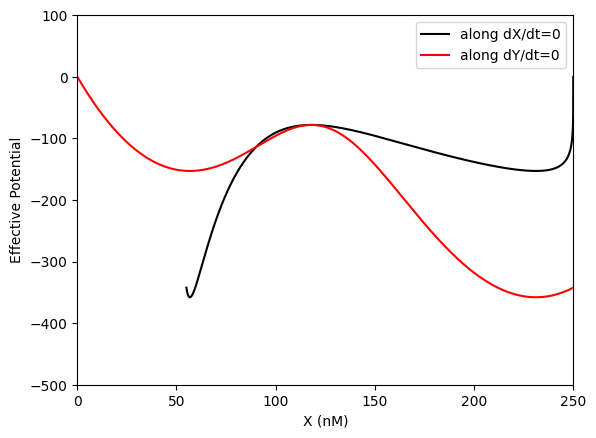

In [2]:
# Define ODE terms
def derivs_ts(t, Xs):
    dXdt = 5 + 20 / (1 + (Xs[1] / 100) ** 4) - 0.1 * Xs[0]
    dYdt = 5 + 20 / (1 + (Xs[0] / 100) ** 4) - 0.1 * Xs[1]
    return np.array([dXdt, dYdt])

# Function to integrate f_Y(X,Y) with the trapezoidal rule
def cal_int_2D_line(line, derivs):
    ntot = len(line)
    U_all = np.zeros(ntot)
    X = 0
    U_all[0] = 0

    for i in range(ntot - 1):
        dx = line[i + 1, 0] - line[i, 0]
        dy = line[i + 1, 1] - line[i, 1]
        Xs_i = line[i, :]
        Xs_i1 = line[i + 1, :]
        dX_i = derivs(0, Xs_i)
        dX_i1 = derivs(0, Xs_i1)

        U_all[i + 1] = U_all[i] - (dX_i[0] + dX_i1[0]) / 2 * dx - (dX_i[1] + dX_i1[1]) / 2 * dy

    return np.column_stack((line, U_all))

# Generate nullclines
null1 = null_fx(20, X_range, Y_range)
null2 = null_fy(20, X_range, Y_range)

# Integrate along nullclines
U1 = cal_int_2D_line(null1, derivs_ts)
U2 = cal_int_2D_line(null2, derivs_ts)

# Plot the results
plt.plot(U1[:, 0], U1[:, 2], label='along dX/dt=0', color='black')
plt.plot(U2[:, 0], U2[:, 2], label='along dY/dt=0', color='red')

plt.xlabel('X (nM)')
plt.ylabel('Effective Potential')
plt.xlim(0, 250)
plt.ylim(-500, 100)
plt.legend()
plt.show()

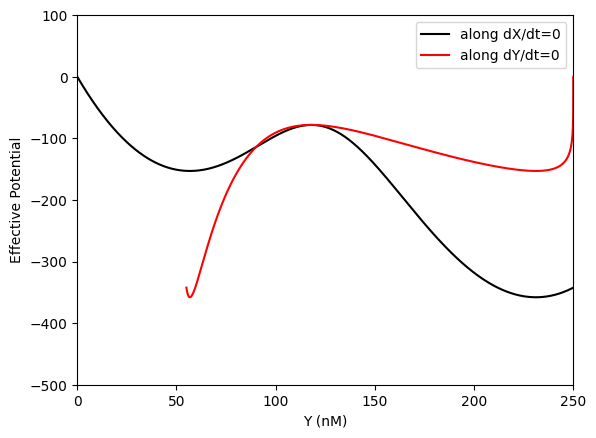

In [3]:
#Plot the results
plt.plot(U1[:, 1], U1[:, 2], label='along dX/dt=0', color='black')
plt.plot(U2[:, 1], U2[:, 2], label='along dY/dt=0', color='red')

plt.xlabel('Y (nM)')
plt.ylabel('Effective Potential')
plt.xlim(0, 250)
plt.ylim(-500, 100)
plt.legend()
plt.show()
